In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
#load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print("x_train.shape",x_train.shape)
print("y_train.shape",y_train.shape)
print("x_test.shape",x_test.shape)
print("y_test.shape",y_test.shape)

x_train.shape (60000, 28, 28)
y_train.shape (60000,)
x_test.shape (10000, 28, 28)
y_test.shape (10000,)


In [4]:
#Normalized data
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg')

In [14]:
#define model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, kernel_initializer = init,  use_bias = False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("elu"),
    keras.layers.Dense(75, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha = 0.3),
    keras.layers.Dense(10, activation = "softmax"),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 784)                 │           3,136 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          78,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 75)                  │           7,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 75)                  │             300 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 75)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             760 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 90,496 (353.50 KB)

 Trainable params: 88,578 (346.01 KB)

 Non-trainable params: 1,918 (7.49 KB)

# Hyperparameters (Power lr)

In [16]:
sgd = keras.optimizers.SGD(decay = 1e-3)
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = sgd,
              metrics = ["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [17]:
run_model1 = model.fit(x_train, y_train, epochs = 40, validation_split = 0.15)

Epoch 1/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7080 - loss: 0.9035 - val_accuracy: 0.8239 - val_loss: 0.4954
Epoch 2/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8276 - loss: 0.5061 - val_accuracy: 0.8437 - val_loss: 0.4407
Epoch 3/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8392 - loss: 0.4556 - val_accuracy: 0.8489 - val_loss: 0.4256
Epoch 4/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8500 - loss: 0.4277 - val_accuracy: 0.8584 - val_loss: 0.3978
Epoch 5/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8577 - loss: 0.4045 - val_accuracy: 0.8607 - val_loss: 0.3891
Epoch 6/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8570 - loss: 0.3986 - val_accuracy: 0.8629 - val_loss: 0.3771
Epoch 7/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8655 - loss: 0.3814 - val_accuracy: 0.8652 - val_loss: 0.3719
Epoch 8/40
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8663 - loss: 0.3739

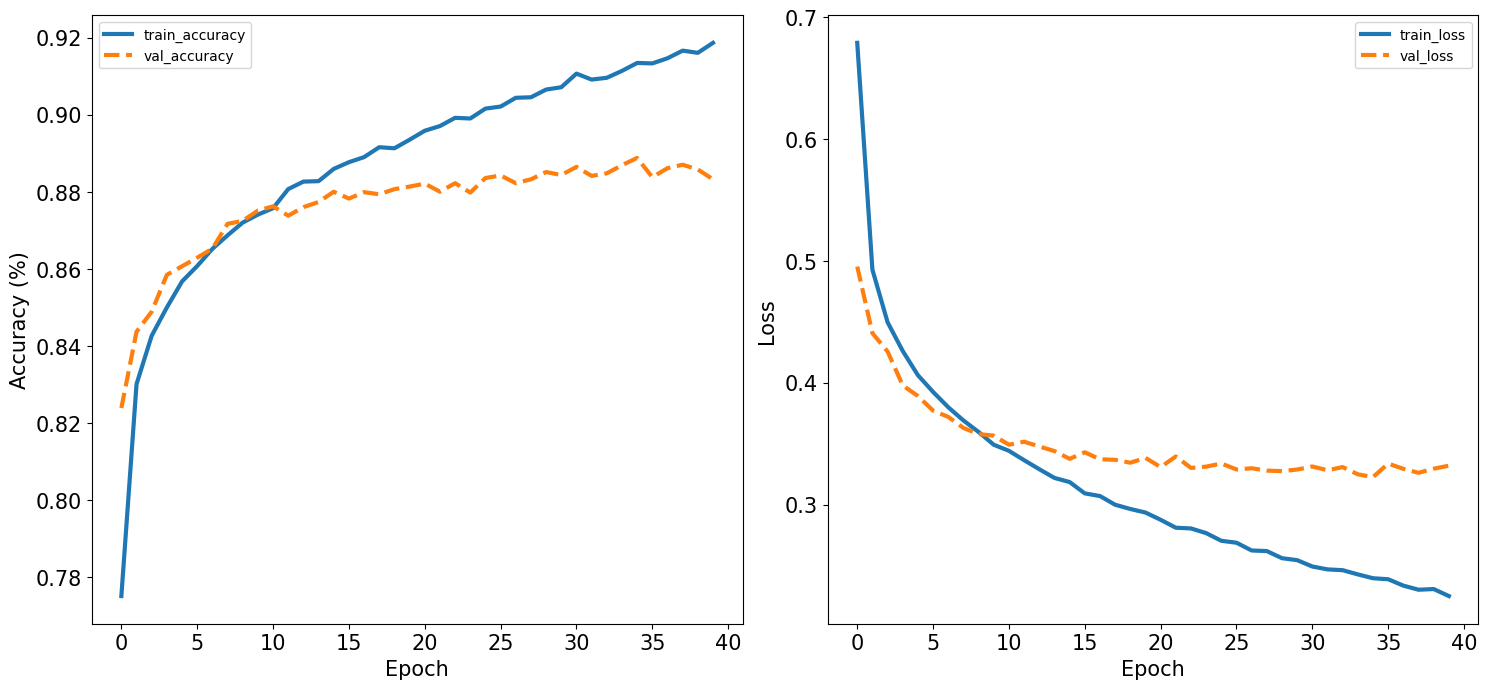

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))  # Adjust figsize as needed
ax1.plot(run_model1.history["accuracy"], label="train_accuracy", lw = 3, linestyle ='-')
ax1.plot(run_model1.history["val_accuracy"], label="val_accuracy", lw = 3, linestyle ='--')
ax1.set_ylabel('Accuracy (%)', fontsize=15)
ax1.set_xlabel('Epoch', fontsize=15)
ax1.legend()
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.plot(run_model1.history["loss"], label="train_loss", lw = 3, linestyle ='-')
ax2.plot(run_model1.history["val_loss"], label="val_loss", lw = 3, linestyle ='--')
ax2.set_ylabel('Loss ', fontsize=15)
ax2.set_xlabel('Epoch', fontsize=15)
ax2.legend()
ax2.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
